<a href="https://colab.research.google.com/github/debplana/bmi707/blob/master/CNN_BMI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, Model, layers
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam


In [0]:
!wget https://www.dropbox.com/s/neharvmmj5wkftk/train_controls_transformed.csv?dl=0
!wget https://www.dropbox.com/s/l7ttj1jjd7rtwbp/train_cases_transformed.csv?dl=0

--2020-05-04 18:13:51--  https://www.dropbox.com/s/neharvmmj5wkftk/train_controls_transformed.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/neharvmmj5wkftk/train_controls_transformed.csv [following]
--2020-05-04 18:13:52--  https://www.dropbox.com/s/raw/neharvmmj5wkftk/train_controls_transformed.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc29b0d9696cb009fde40b1bf51f.dl.dropboxusercontent.com/cd/0/inline/A3Gzj7m-JlbZeTKDiXKzPDrQ3PKFh4c6X7KbGznKkyZV9a8e_S6TF2hhHerGsoN1_pYGPesolaO3ZK2CYIge68LQFGji5_KMls2rCof9WvNim-U0Qnrce1GxkObaf9n-gnE/file# [following]
--2020-05-04 18:13:52--  https://uc29b0d9696cb009fde40b1bf51f.dl.dropboxusercontent.com/cd/0/inline/A3Gzj7m-JlbZeTKDiXKzPDrQ3PKFh4c6X7KbGznKkyZV9a8e_S6TF2h

In [0]:
!wget https://www.dropbox.com/s/eqpxj42chflzfl4/holdout_cases_transformed.csv?dl=0
!wget https://www.dropbox.com/s/f4zsvv2eeia5lbl/holdout_controls_transformed.csv?dl=0

--2020-05-04 18:14:53--  https://www.dropbox.com/s/eqpxj42chflzfl4/holdout_cases_transformed.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/eqpxj42chflzfl4/holdout_cases_transformed.csv [following]
--2020-05-04 18:14:53--  https://www.dropbox.com/s/raw/eqpxj42chflzfl4/holdout_cases_transformed.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc634e7ca3bc51fbd71abe250b0e.dl.dropboxusercontent.com/cd/0/inline/A3G1Z7Hts6Y5Syp-1V4icKf8fHkWenfzrwfKDm7ihQTTrTUO_vWQte0yfJbjbmXjVcPZJTwr5ucLrHCJLhkGL1BS4NkqwBn754Qr4kVw8ZPq7JYRg2D0r7kMG_UztCZ6QoA/file# [following]
--2020-05-04 18:14:53--  https://uc634e7ca3bc51fbd71abe250b0e.dl.dropboxusercontent.com/cd/0/inline/A3G1Z7Hts6Y5Syp-1V4icKf8fHkWenfzrwfKDm7ihQTTrTUO_vWQte0yfJ

In [0]:
# Load data
colnames = pd.array(range(1,112321)) # The number of time intervals in the database
train_cases = pd.read_csv('/content/train_cases_transformed.csv?dl=0', names = colnames, header = None)
train_controls = pd.read_csv('/content/train_controls_transformed.csv?dl=0', names = colnames, header = None)

In [0]:
# Load data
colnames = pd.array(range(1,112321)) # The number of time intervals in the database
test_cases = pd.read_csv('/content/holdout_cases_transformed.csv?dl=0', names = colnames, header = None)
test_controls = pd.read_csv('/content/holdout_controls_transformed.csv?dl=0', names = colnames, header = None)

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, Model, optimizers
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPool1D, GlobalMaxPooling1D, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.utils import shuffle
import tensorflow as tf


input = Input(shape=(112320,1))
x = Conv1D(filters=1,kernel_size=20000,strides=50)(input)
x = Conv1D(filters=100,kernel_size=100,strides=5)(x)
x = Dropout(0.1)(x)
x = MaxPool1D(2)(x)
x = Conv1D(filters=25,kernel_size=5,strides=1)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
x = GlobalMaxPooling1D()(x)
pred = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input, outputs=pred)

# Compile
opt = optimizers.Adam(lr=0.000005)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])





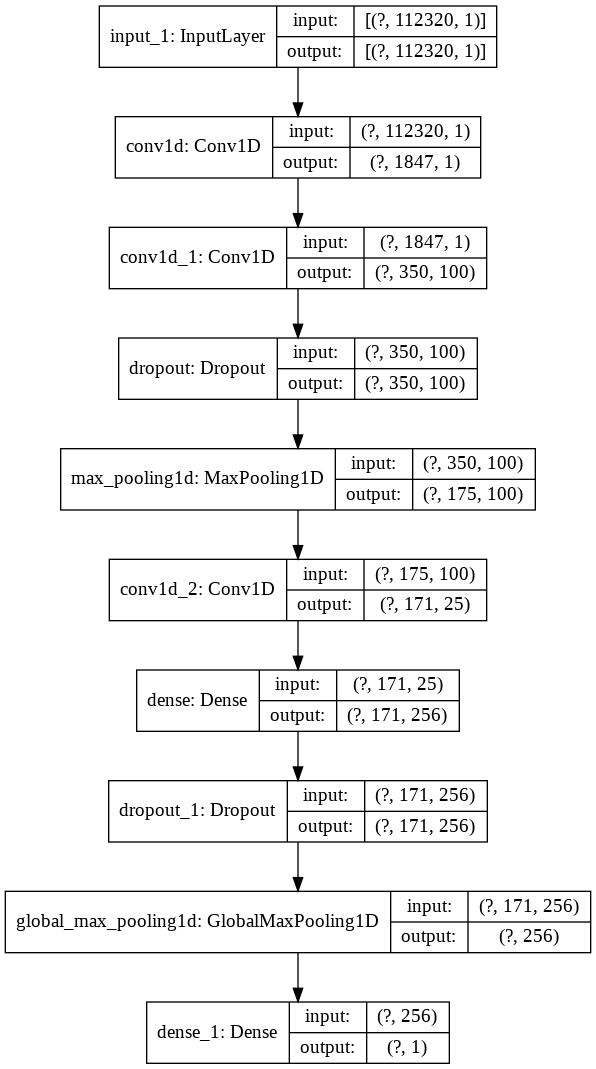

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
# Creating labels
zeros = pd.Series(np.zeros(173))
ones = pd.Series(np.ones(173))
y_test = zeros.append(ones)
y_test = pd.DataFrame(data=y_test)
#print(y_test)

# Combine cases and controls
x_test = pd.concat([test_controls, test_cases])
#print(x_test)
indexNamesArr = x_test.index.values
#print(indexNamesArr)

# Renaming labels
y_test.index = [indexNamesArr]
#print(y_test)

# Downsampling
x_test_reduced = x_test.groupby(np.arange(len(x_test.columns))//256, axis=1).mean()


# Scaling
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
x_test_norm = scaler.fit_transform(x_test_reduced)
#print(x_test_norm)
# Re-shaping data for the LSTM
#print(x_test_reduced.shape)
x_test_reshaped = x_test_norm.reshape(346, -1, 1)
#print(x_test_reshaped.shape)

y_test_reshaped = np.asarray(y_test).astype('float32').reshape((-1,1))
#print(y_test_reshaped)
#print(y_test_reshaped.shape)

In [0]:
# convert the categories to one-hot encoding
from keras.utils import np_utils

y_train_reshaped = np_utils.to_categorical(y_train_reshaped, 2)
y_test_reshaped = np_utils.to_categorical(y_test_reshaped, 2)

Using TensorFlow backend.


In [0]:
from keras import backend as K
# Model
def evaluate_model(trainX, trainy, testX, testy):
  verbose, epochs, batch_size = 1, 10, 64

  model = Sequential()
  model.add(layers.LSTM(units=100, return_sequences=True, input_shape=(x_train_reshaped.shape[1],1)))
  model.add(layers.LSTM(units=100))
  model.add(Dropout(0.1))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))
  model.summary()
  opt = Adam(lr=0.0001)
  inter_output_model = Model(model.input, model.get_layer(index = 4).output )
  inter_output = inter_output_model.predict(trainX)
  # Compile
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])
  # fit network
  model.fit(trainX, trainy, validation_split=0.9, epochs=epochs, batch_size=batch_size, verbose=verbose)
  # evaluate model
  _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  
  return inter_output

inter_output = evaluate_model(x_train_reshaped, y_train_reshaped, x_test_reshaped, y_test_reshaped)


Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 439, 100)          40800     
_________________________________________________________________
lstm_97 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_56 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 102       
Total params: 126,352
Trainable params: 126,352
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 3s 1s/step - loss: 0.6929 - acc: 0.9638 - val_loss: 0.6932 - va

In [0]:
print(inter_output)

[[0.5007074  0.5003023 ]
 [0.500642   0.50033504]
 [0.50085604 0.50036365]
 ...
 [0.501092   0.50042695]
 [0.50043356 0.50016505]
 [0.50107765 0.50043464]]


In [0]:
# Visualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: ignored